In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score

# Explorative Data Analysis

In [93]:
# fist load the data and have a overview of the data
# we would take a look on the day.csv but only focus on hour.csv 
dataset_hour = pd.read_csv('hour.csv', sep=',')
dataset_hour.head() 

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [94]:
dataset_day = pd.read_csv('day.csv',sep = ',')
dataset_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [95]:
dataset_hour.shape

(17379, 17)

In [96]:
dataset_day.shape

(731, 16)

In [342]:
# check feature types
dataset_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null int64
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(13)
memory usage: 2.3 MB


In [98]:
# Describing all the Numerical Features
dataset_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [99]:
# Describing all the Categorical Features
dataset_hour.describe(include=['O'])

,dteday
count,17379
unique,731
top,2011-01-20
freq,24


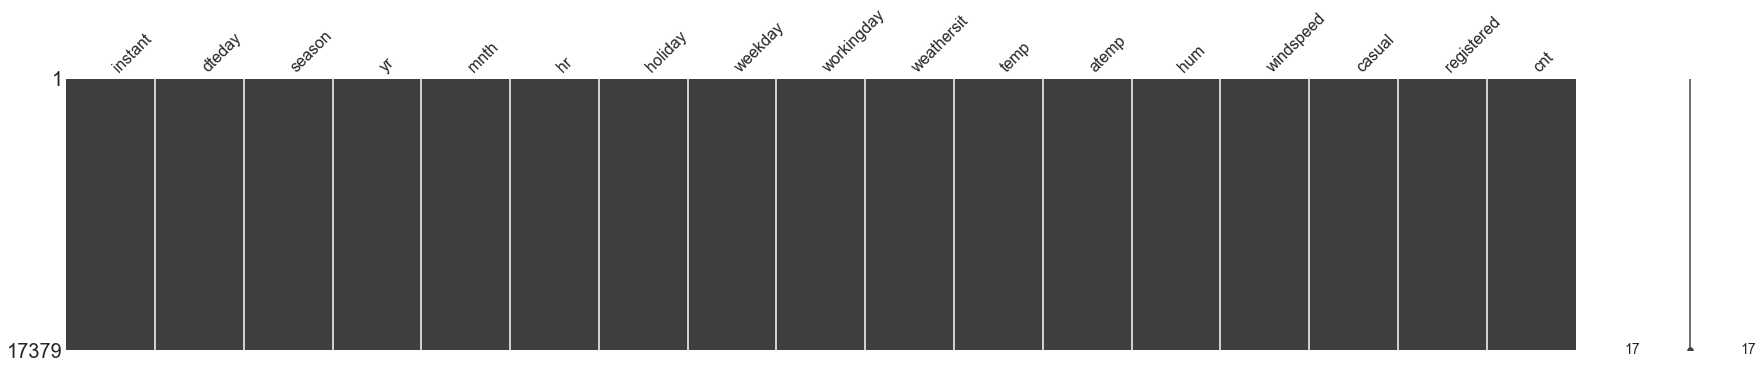

In [100]:
# visulize the missing values 
missingno.matrix(dataset_hour, figsize = (30,5))

In [101]:
# encode the 'dteday' to numerical for a better analysing job
# since the year and month are already encoded to 'yr' and 'mnth', we only need to extract the 'day'
dataset_hour.dteday = pd.to_datetime(dataset_hour.dteday).dt.day
dataset_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [102]:
#check the value range of extracted 'day'
dataset_hour.dteday.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [206]:
# drop the feature 'instant' because it can be replace by index
dataset = dataset_hour.drop(['instant'],axis = 1)
dataset.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


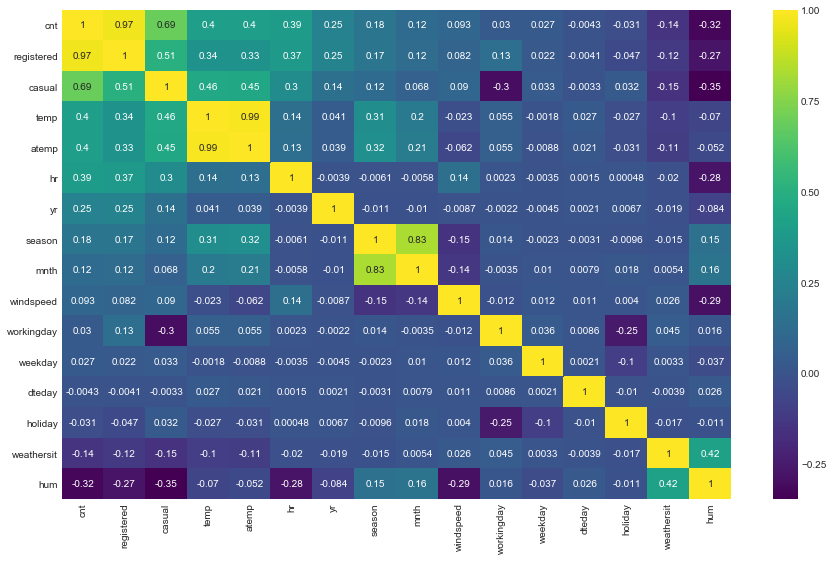

In [207]:
# Quality correlation matrix
k = 16 #number of variables for heatmap
cols = dataset.corr().nlargest(k, 'cnt')['cnt'].index
cm = dataset[cols].corr()
plt.figure(figsize=(15,9))
sns.heatmap(cm, annot=True, cmap = 'viridis')

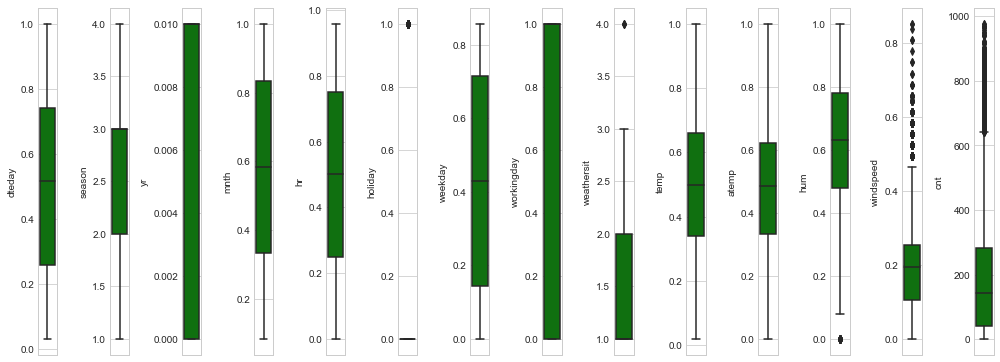

In [208]:
# Boxplot of every feature
l = df.columns.values
number_of_columns=16
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df[l[i]],color='green',orient='v')
    plt.tight_layout()

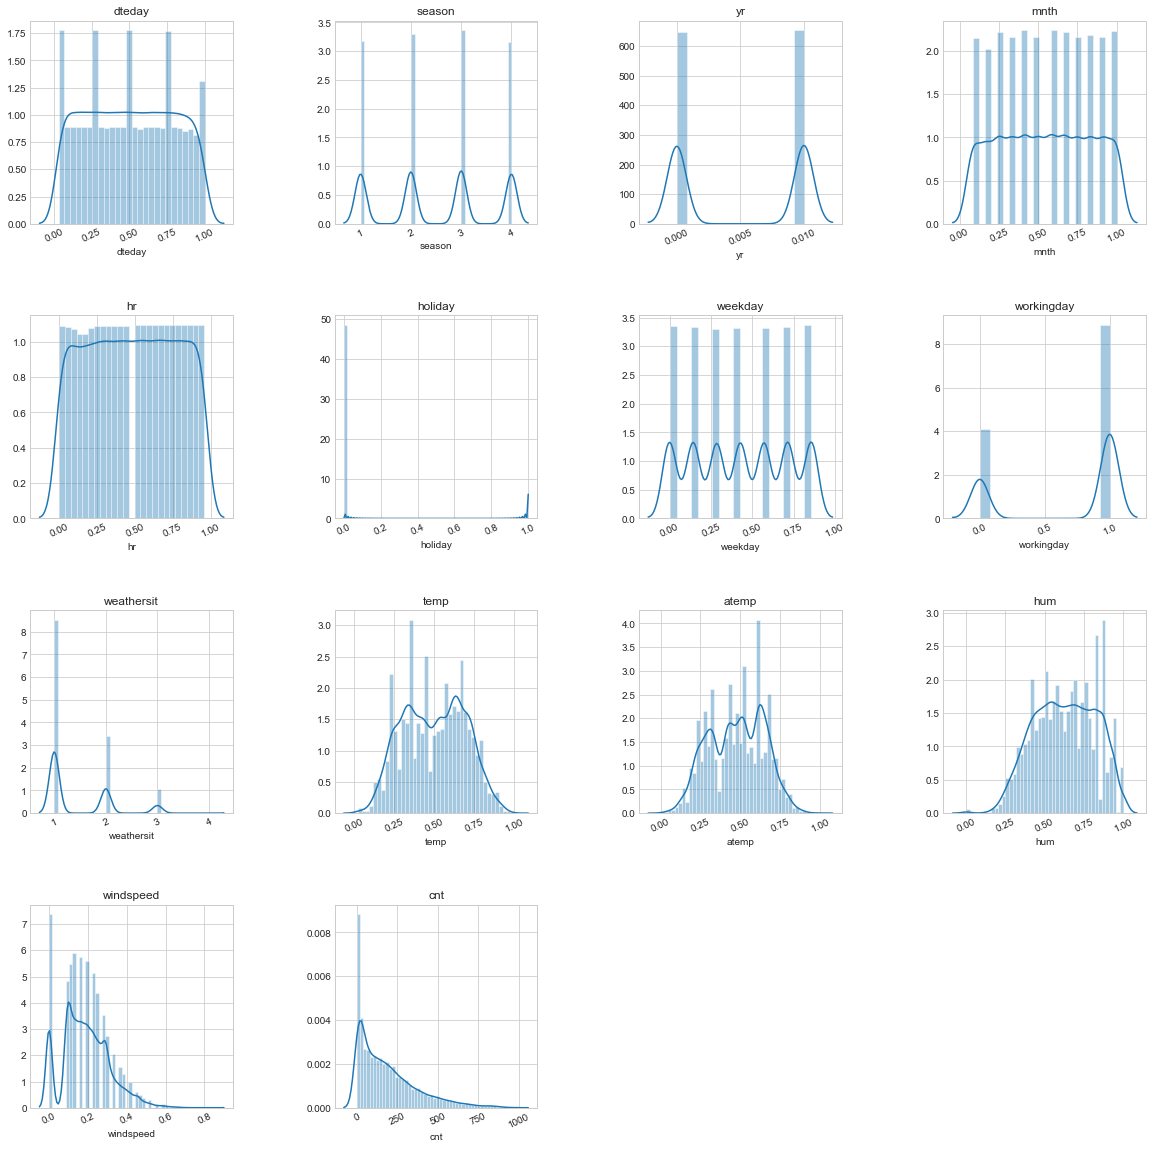

In [209]:
# plot the distribution of each feature
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)
    
plot_distribution(df, cols=4, width=20, height=20, hspace=0.45, wspace=0.5)

/Users/zijian/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


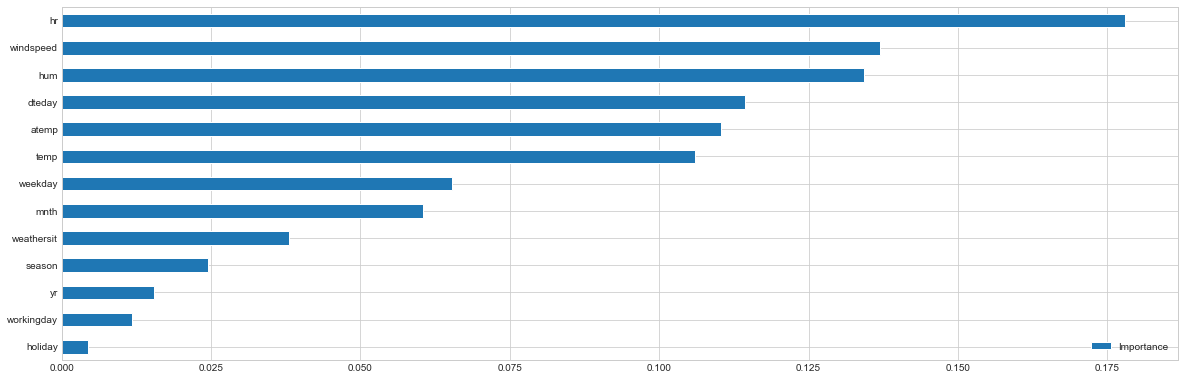

In [210]:
# Using Random Forest to gain an insight on Feature Importance
clf = RandomForestClassifier()
clf.fit(df.drop('cnt', axis=1), df['cnt'])
plt.style.use('seaborn-whitegrid')
importance = clf.feature_importances_
importance = pd.DataFrame(importance, index=df.drop('cnt', axis=1).columns, columns=["Importance"])
importance.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(20,len(importance)/2));

In [108]:
# show some trend of 'cnt' along the time with the help of the day.cvs
dataset_day.dteday = pd.to_datetime(dataset_day.dteday)
dataset_day.set_index('dteday', inplace=True)
dataset_day.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


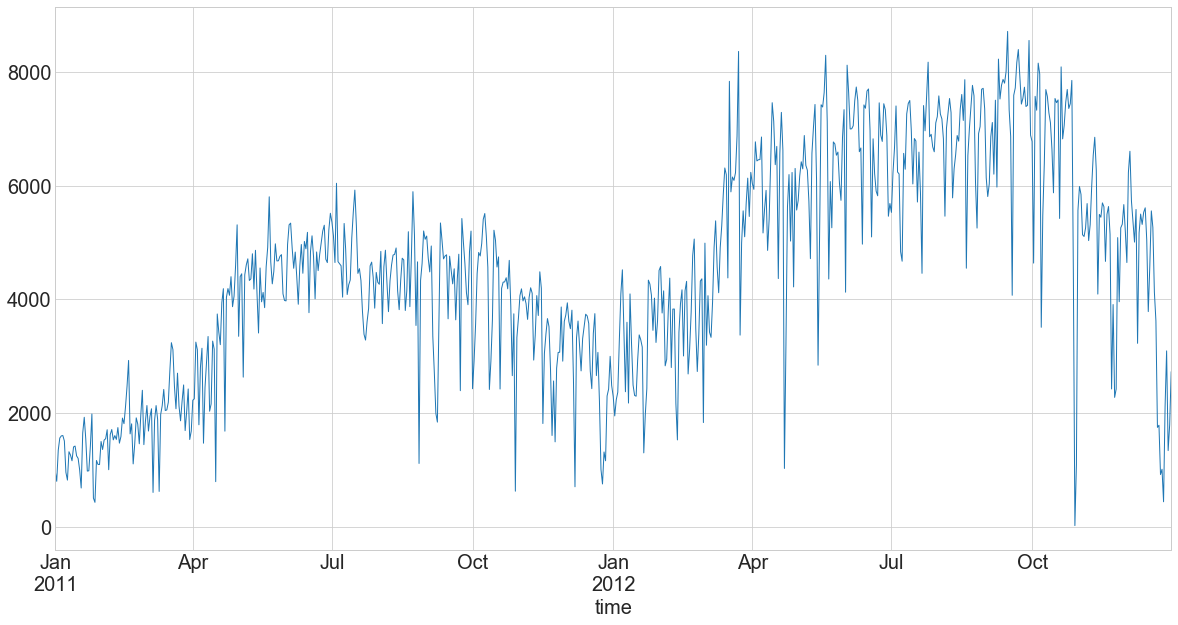

In [109]:
dataset_day.cnt.plot(figsize=(20,10), linewidth=1, fontsize=20)
plt.xlabel('time',fontsize=20);

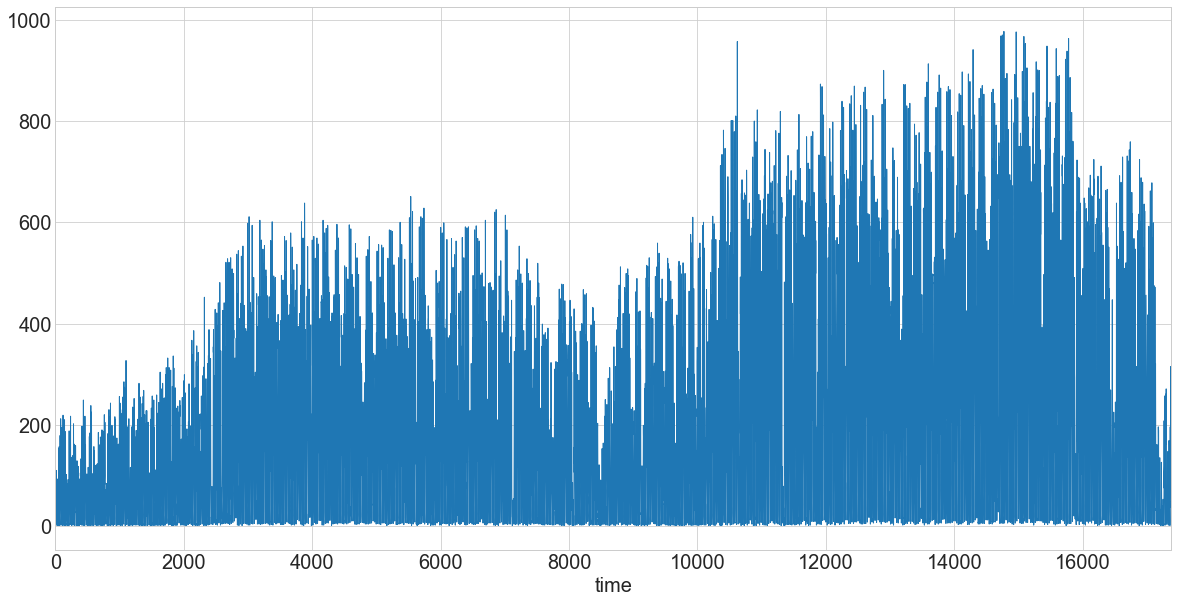

In [211]:
# show 'cnt' trend along the time (hourly)
dataset.cnt.plot(figsize=(20,10), linewidth=1, fontsize=20)
plt.xlabel('time',fontsize=20);

# Feature Engineering

In [225]:
# drop the 'registed' and 'casual' features 
# because in the reality these two features should be empty and 'cnt' is the sum of them
# drop 'dteday' because the most important imformation of it is encoded into 'holiday, weekday, workingday'
df = dataset.drop(['registered','casual','dteday',],axis = 1)
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [226]:
# standarlize the feature 'yr', since that all other numerical features are standarlized
# take 'dteday' as numerical feature to invoid a too sparse matrix
df.yr = df.yr/100
df.mnth = df.mnth/12
df.hr = df.hr/24
df.weekday = df.weekday/7

In [227]:
df.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.005026,0.544815,0.481115,0.028770,0.429098,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,1.106918,0.005000,0.286565,0.288100,0.167165,0.286539,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.333333,0.250000,0.000000,0.142857,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,3.000000,0.010000,0.583333,0.500000,0.000000,0.428571,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,3.000000,0.010000,0.833333,0.750000,0.000000,0.714286,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,4.000000,0.010000,1.000000,0.958333,1.000000,0.857143,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


In [228]:
# split the data into training set and test set and set
X_train, X_test, y_train, y_test = train_test_split(df.drop(['cnt'],axis = 1), df.cnt, test_size=0.2, random_state = 5)
X_train.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
13470,3,0.01,0.583333,0.458333,0,0.714286,1,3,0.72,0.6970,0.74,0.1940
5932,3,0.00,0.750000,0.708333,0,0.714286,1,1,0.70,0.6667,0.79,0.2537
6114,3,0.00,0.750000,0.333333,0,0.857143,0,2,0.46,0.4545,0.77,0.2537
6403,4,0.00,0.750000,0.375000,0,0.571429,1,1,0.62,0.5909,0.78,0.2537
15666,4,0.01,0.833333,0.958333,0,0.714286,1,1,0.46,0.4545,0.88,0.1045


In [229]:
y_train.head()

13470    212
5932     505
6114     108
6403     225
15666    131
Name: cnt, dtype: int64

In [230]:
# get the index of catergorical features
def get_index():
    features = ['season','holiday','workingday' ,'weathersit']
    for feature in features:
        yield df.columns.get_loc(feature)

In [231]:
feature_indexes = list(get_index())
print(feature_indexes)

[0, 4, 6, 7]


In [329]:
# one-hot-encoder model training on categorical features
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(categorical_features = feature_indexes)
enc.fit(df.drop(['cnt'], axis = 1))

#persist the trained one-hot-encoder, so that it could be used for feature proccessing for prediction
dump(enc, 'enc.joblib') 

/Users/zijian/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/zijian/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


['enc.joblib']

In [324]:
# one hot encoing on training set
ohe_X_train = enc.transform(X_train)

In [325]:
ohe_X_train

<13903x20 sparse matrix of type '<class 'numpy.float64'>'
	with 155537 stored elements in COOrdinate format>

In [326]:
# one hot encoing on test set
ohe_X_test = enc.transform(X_test)
ohe_X_test

<3476x20 sparse matrix of type '<class 'numpy.float64'>'
	with 38934 stored elements in COOrdinate format>

# Model Fitting

In [240]:
# visualize the prediction and test and evaluate model
def model_evaluate(predictions):
    plt.scatter(y_test,predictions)
    print('r2 score: ' + format(r2_score(y_test,predictions)))
    print('mean absolute err: '+ format(mean_absolute_error(y_test,predictions)))
    print('explained variance score: ' + format(explained_variance_score(y_test,predictions)))

In [327]:
# let's try firstly the simplest linear regression model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(ohe_X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

r2 score: 0.3949522428895851
mean absolute err: 106.71787076839979
explained variance score: 0.39510468314864877


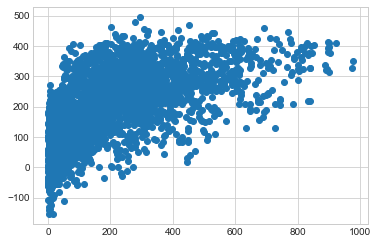

In [328]:
# visualize the prediction and test and evaluate model
lm_predictions = lm.predict(ohe_X_test)
model_evaluate(lm_predictions)

In [162]:
from joblib import dump, load
dump(lm, 'lm.joblib') 

['lm.joblib']

In [343]:
# use grid search and cross validation to search the optimal hyperparameters of SVR
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3], 'C': [10,100,300]},
                    {'kernel': ['poly'], 'gamma': [0.1, 0.2, 0.3], 'C': [10,100,300]}]
svr = GridSearchCV(SVR(), tuned_parameters, cv=5, scoring = 'r2')
svr.fit(ohe_X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3], 'C': [10, 100, 300]}, {'kernel': ['poly'], 'gamma': [0.1, 0.2, 0.3], 'C': [10, 100, 300]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [345]:
svr.best_params_

{'C': 300, 'gamma': 0.3, 'kernel': 'poly'}

In [346]:
svr.best_estimator_ 

SVR(C=300, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.3,
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

r2 score: 0.5200553681232882
mean absolute err: 80.64646469240392
explained variance score: 0.5482481820208023


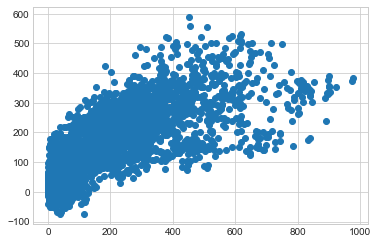

In [347]:
svr_predictions = svr.best_estimator_.predict(ohe_X_test)
model_evaluate(svr_predictions)

In [348]:
# save the best estimator of SVR
dump(svr.best_estimator_, 'svr.joblib') 

['svr.joblib']

In [254]:
# try the Xgboost
import xgboost as xgb
xgb= xgb.XGBRegressor(colsample_bytree=0.2,
                       gamma=0.0,
                       learning_rate=0.05,
                       max_depth=6,
                       min_child_weight=1.5,
                       n_estimators=7200,
                       reg_alpha=0.9,
                       reg_lambda=0.6,
                       subsample=0.2,
                       seed=42,
                       silent=1)

xgb.fit(ohe_X_train, y_train)

/Users/zijian/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.2, gamma=0.0, importance_type='gain',
       learning_rate=0.05, max_delta_step=0, max_depth=6,
       min_child_weight=1.5, missing=None, n_estimators=7200, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0.9,
       reg_lambda=0.6, scale_pos_weight=1, seed=42, silent=1,
       subsample=0.2)

r2 score: 0.948580281529061
mean absolute err: 28.100067250619205
explained variance score: 0.948580789749249


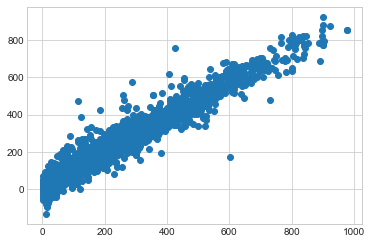

In [351]:
xgb_predictions = xgb.predict(ohe_X_test)
model_evaluate(xgb_predictions)

In [258]:
# save the trained xgboost model
dump(xgb, 'xgb.joblib') 

['xgb.joblib']

r2 score: 0.3949702105433903
mean absolute err: 106.70392684807038
explained variance score: 0.39512217096785884


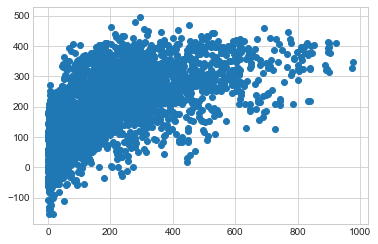

In [256]:
# train the 
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.00099, max_iter=50000)
lasso.fit(ohe_X_train,y_train)
lasso_predictions = lasso.predict(ohe_X_test)
model_evaluate(lasso_predictions)

# generate some input data for unit test

In [350]:
# using the first 24 rows in hour.csv to generate a simple dataset for test 
# considering the in the real situation the count of 'casual','registered'and'cnt' would be blank
# so drop them and save dataset to csv file
test_df = pd.read_csv('hour.csv', sep=',').head(24)
test_df = test_df.drop(['casual','registered','cnt'], axis = 1)
test_df.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0


In [318]:
test_df.to_csv('test_dataset.csv', sep=',',index=False)